In [1]:
import numpy as np
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import PunktSentenceTokenizer , TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score


/Users/ashish/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train = pd.read_csv('data/train_kaggle.csv', sep=',', encoding='utf-8')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [4]:
df_train['text'].apply(type).unique()
# explore more why the text type is coming as float

print("Before removing float type: ",df_train.shape)
# only remove rows with text as float type

df_train = df_train.drop(df_train[df_train['text'].apply(type) == float].index)
print("After removing float type: ", df_train.shape)

Before removing float type:  (20800, 5)
After removing float type:  (20761, 5)


In [5]:
#change above X if we r using tokenize and other nlp process
#Dropping the Nan values and info
df_train.dropna(inplace=True)
X = df_train['text']
y = df_train['label']

# do the similar think on headline (author ?? or source)
# name these to test , validation
X_train,  X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [ ]:
# stop = set(stopwords.words('english'))
# snowball = SnowballStemmer('english')
# treebank_word_tokenize = TreebankWordTokenizer().tokenize

# def customer_tokenize(col):
#     tokens = [treebank_word_tokenize(content.lower())for content in col]
#     tokens2 = [[word for word in words if word not in stop] for words in tokens]
#     snowballs = [[snowball.stem(word) for word in words]
#                  for words in tokens2]
#     bag_of_words = []
#     for lst in snowballs:
#         for word in lst:
#             bag_of_words.append(word)
#     return bag_of_words

# tfidfvect = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
# tfidf_vectorized = tfidfvect.fit_transform(new_train['trigger'])

In [6]:
tfidf_vectorizer  = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1,2), max_df= 0.85, min_df= 2)

In [7]:
#takes around 2-3 mins
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Modeling

### Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb = nb.fit(X_train_tfidf, y_train)
y_test_predict_nb = nb.predict(X_test_tfidf)

In [10]:
nb_acc = accuracy_score(y_test, y_test_predict_nb) *  100 
nb_F1 = f1_score(y_test, y_test_predict_nb) * 100
nb_precision = precision_score(y_test, y_test_predict_nb) * 100
nb_recall = recall_score(y_test, y_test_predict_nb) * 100
print ("Naive Bayes accuracy and F1 score \n")
print ("Accuracy {:.5}".format(nb_acc))
print ("F1 {:.5}".format(nb_F1))
print ("Precision {:.5}".format(nb_precision))
print ("Recall {:.5}".format(nb_recall))

Naive Bayes accuracy and F1 score 

Accuracy 76.155
F1 61.141
Precision 100.0
Recall 44.031


### Logistic Regression

In [11]:
lr = LogisticRegression(penalty='l1')
# train our model
lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
y_test_predict_lr = lr.predict(X_test_tfidf)

In [13]:
lr_acc = accuracy_score(y_test, y_test_predict_lr) *  100 
lr_F1 = f1_score(y_test, y_test_predict_lr) * 100
lr_precision = precision_score(y_test, y_test_predict_lr) * 100
lr_recall = recall_score(y_test, y_test_predict_lr) * 100
print ("Logistic regression accuracy and F1 score \n")
print ("Accuracy {:.5}".format(lr_acc))
print ("F1 {:.5}".format(lr_F1))
print ("Precision {:.5}".format(lr_precision))
print ("Recall {:.5}".format(lr_recall))

Logistic regression accuracy and F1 score 

Accuracy 94.285
F1 93.338
Precision 92.717
Recall 93.967



### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=3)
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
y_test_predict_rf = rf.predict(X_test_tfidf)

In [17]:
rf_acc = accuracy_score(y_test, y_test_predict_rf) *  100 
rf_F1 = f1_score(y_test, y_test_predict_rf) * 100
rf_precision = precision_score(y_test, y_test_predict_rf) * 100
rf_recall = recall_score(y_test, y_test_predict_rf) * 100
print ("Random Forest accuracy and F1 score \n")
print ("Accuracy {:.5}".format(rf_acc))
print ("F1 {:.5}".format(rf_F1))
print ("Precision {:.5}".format(rf_precision))
print ("Recall {:.5}".format(rf_recall))

Random Forest accuracy and F1 score 

Accuracy 91.441
F1 89.188
Precision 96.559
Recall 82.863


### Lets plot ROC curve for various models

Import necessary library for ploting


In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as skm
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline

In [20]:

# First calculate predicted probabilities for all the models
nb_probs = nb.predict_proba(X_test_tfidf)[:, 1]
lr_probs = lr.predict_proba(X_test_tfidf)[:, 1]
rf_probs = rf.predict_proba(X_test_tfidf)[:, 1]

#fpr, tpr, threshold = roc_curve(y_test, preds)
fpr_nb, tpr_nb, thresholds_nb = skm.roc_curve(y_test, nb_probs)
fpr_lr, tpr_lr, thresholds_lr = skm.roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, thresholds_rf = skm.roc_curve(y_test, rf_probs)

roc_auc_nb = skm.auc(fpr_nb, tpr_nb)
roc_auc_lr = skm.auc(fpr_lr, tpr_lr)
roc_auc_rf = skm.auc(fpr_rf, tpr_rf)

In [22]:
roc_auc_nb, roc_auc_lr, roc_auc_rf

(0.9814334841274744, 0.9848488277014361, 0.9850295482719627)

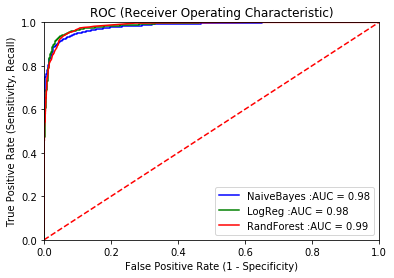

In [21]:
#Now plot these values
plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'NaiveBayes :AUC = %0.2f' % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, 'g', label = 'LogReg :AUC = %0.2f' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, 'r', label = 'RandForest :AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.show()

In [23]:
import sklearn.metrics as skm
skm.roc_auc_score(y_test, y_test_predict_nb),  skm.roc_auc_score(y_test, y_test_predict_lr), skm.roc_auc_score(y_test, y_test_predict_rf)

(0.7201540436456997, 0.9424391222423295, 0.9033556232229909)

#### To see only one ROC curve,

Explore why ROC is not giving us correct curve. I can clearly see I am getting bad performance in case of Naive Bayes and its roc_auc_score when calculated is also 0.72. But when using roc_curve from sklearn.metrics somehow the fpr and tpr are not coming correctly??? Below is just a 

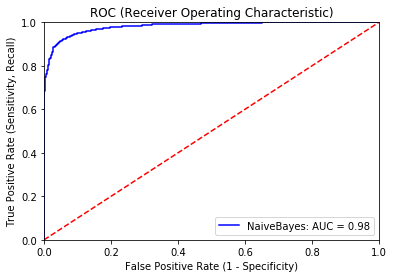

In [25]:
nb_probs = nb.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_probs)
roc_auc_nb = skm.auc(fpr_nb, tpr_nb)
plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr_nb, tpr_nb, 'b', label = 'NaiveBayes: AUC = %0.2f' % roc_auc_nb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.show()

